In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

In [2]:
# read dataset
df = pd.read_csv('csv/hotel_bookings_data.csv')
print(df.shape) # melihat ukuran kolom dan baris dari suatu dataframe
df.head()

(119390, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
# melihat general info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# melihat deskripsi statistik dari dataframe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Preprocessing

## Mengatasi Data Null

In [5]:
# pertama check di kolom mana saja terdapat data null
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
## Terdapat 4 kolom yang memiliki null ##

# Kolom Children dapat kita isi dengan angka 0 menggambarkan tidak adanya anak dalam data pemesanan hotel
df['children'] = df['children'].fillna(0)

# Kolom city dapat kita isi dengan "unknown" karena tidak diketahui negara asal dari pemesan hotel
df['city'] = df['city'].fillna('unknown')

# Kolom agent dan company dapat kita isi juga dengan angka 0 sebagai "undefined" value, mengapa angka 0? karena pada agent dan company tidak terdapat angka 0 (minimum value agent: 1, maksimum value company: 6)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Mengganti value yang tidak sesuai

In [7]:
# data "meal" mengandung value "Undefined", yang sebetulnya sama dengan "No Meal"
df["meal"].replace("Undefined", "No Meal", inplace=True)

## Menghapus data yang tidak diperlukan

In [8]:
# Membuat data total guest yaitu jumlah dari adults, children, dan babies
df["guest"] = df["adults"]+df["children"]+df["babies"]
print("Data with 0 guest: {0} out of {1} all data".format(df[df["guest"] == 0].shape[0], df.shape[0]))

# Kita akan hapus data yang memiliki 0 guest
df_preprocessing = df[df["guest"] > 0].copy()
df_preprocessing.shape

Data with 0 guest: 180 out of 119390 all data


(119210, 30)

## All in One Preprocessing 

In [9]:
# Part ini berisi 3 langkah yang telah kita lakukan dan dikemas dalam satu cell, agar lebih efisien
# read data
df = pd.read_csv('csv/hotel_bookings_data.csv') 

# Mengisi null values
nan_replacements = {"children:": 0.0, "city": "Unknown", "agent": 0, "company": 0}
df_fill = df.fillna(nan_replacements)

# Mengganti value yang tidak sesuai
df_fill["meal"].replace("Undefined", "No Meal", inplace=True)

# Menghapus data dengan total 0 guest
df_fill["guest"] = df_fill["adults"]+df_fill["children"]+df_fill["babies"]
df_prep = df_fill[df_fill["guest"] > 0].copy()

print("before pre-processing: ", df.shape[0])
print("after pre-processing: ", df_prep.shape[0])

before pre-processing:  119390
after pre-processing:  119206


In [10]:
df['arrival_date_year'].unique()

array([2017, 2018, 2019], dtype=int64)

# Analisis Jumlah Pemesanan Hotel per Bulan berdasarkan tipe Hotel

In [11]:
# Melakukan copy pada data hasil pre-processing
df1 = df_prep.copy()

# Membuat data agregasi untuk menghitung jumlah pemesanan hotel per bulan berdasarkan tipe hotel
df1_gr = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1_gr.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # mengubah nama kolom tabel
df1_gr

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Perhatikan data bulan Juli dan Agustus diambil dari data 3 tahun lalu, sedangkan bulan-bulan lain hanya diambil dari data 2 tahun lalu, perlu dilakukan normalisasi agar perbandingannya sesuai

In [12]:
# normalisasi untuk mendapatkan jumlah rata-rata pemesanan di suatu bulan pada tahun yang berbeda
df1_gr['average_num_booking'] = round(df1_gr['num_booking']/df1_gr['unique_year'])
df1_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0


Penulisan nama bulan lebih baik disingkat, untuk mempermudah visualisasi. Oleh karena itu, dibuat kolom baru yang berisi singkatan dari nama bulan yakni 3 huruf pertama dari nama bulan

In [13]:
# Mengurutkan data berdasarkan bulan, serta membuat singkatan Bulan agar lebih mudah divisualisasi
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df1_gr["month"] = df1_gr["arrival_month"].str[:3] # mengambil 3 huruf terdepan dari setiap bulan
df1_gr["month"] = pd.Categorical(df1_gr["month"], categories=ordered_months, ordered=True) # mengurutkan bulan

df1_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan


Tujuan dari plot yang ingin ditampilkan adalah untuk membandingkan 2 tipe hotel dalam setiap bulannya. Yakni tipe hotel Kota dan tipe hotel Resort dari bulan Januari sampai Desember. Oleh karena itu, jenis plot yang tepat adalah line plot.

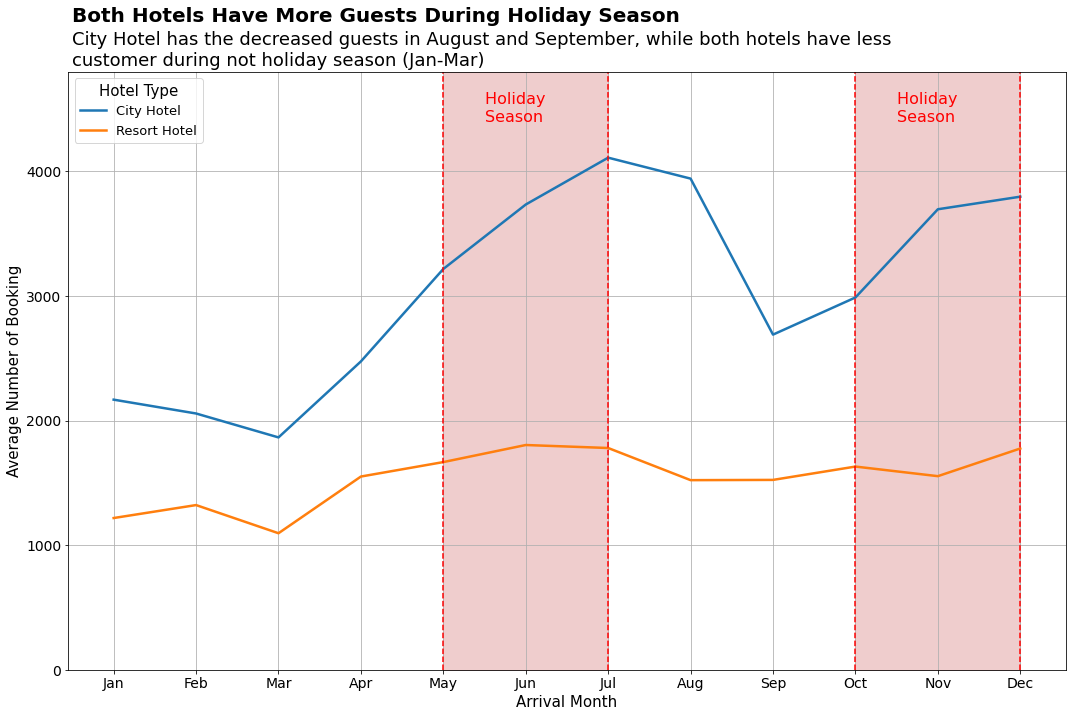

In [14]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', 
             size="hotel_type", sizes=(2.5, 2.5), data=df1_gr) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Arrival Month', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Average Number of Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=5200, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="City Hotel has the decreased guests in August and September, while both hotels have less \ncustomer during not holiday season (Jan-Mar)", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('fig/investigate_hotel_business_v01.png', dpi=200); # menyimpan gambar

# Analisa Pengaruh Durasi Menginap terhadap tingkat Pembatalan Pemesanan Hotel

<AxesSubplot:xlabel='total_nights', ylabel='Count'>

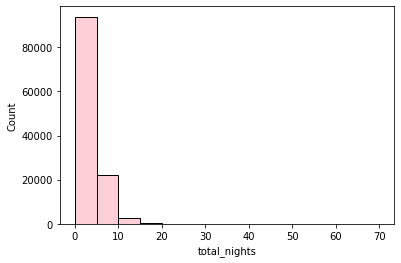

In [15]:
# Melakukan copy pada data hasil pre-processing
df2 = df_prep.copy()

# Melakukan agregasi data untuk mendapatkan durasi menginap berdasarkan jenis hotel
df2["total_nights"] = df2["stays_in_weekend_nights"] + df2["stays_in_weekdays_nights"] # mencari total malam yang dipesan

sns.histplot(data=df2, x="total_nights", binwidth=5, color="pink")

Berdasarkan pada histogram di atas, dapat dilihat bahwa persebaran data terlihat right-skewed. Oleh karena itu dilakukan pengelompokkan untuk membuat persebarannya menjadi lebih merata. Pengelompokkan tersebut dilakukan untuk total jumlah malam yang mencapai 3 minggu maka dikelompokkan dari malam ke-15 sampai malam ke-21 (15-21). Selanjutnya untuk total malam yang lebih dari 3 minggu (>21)


In [16]:
# pengelompokkan data berdasarkan hasil pengamatan distribusi data
df2['total_nights_group'] = np.where(df2['total_nights'] > 21, 21, 
                                       np.where(df2['total_nights'] > 14, 15, df2['total_nights']))

# membuat tabel agregat
df2_gr = df2.groupby(['hotel', 'is_canceled', 'total_nights_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2_pivot = df2_gr.pivot_table(index=['hotel', 'total_nights_group'], columns='is_canceled', values='num_bookings').reset_index()
df2_pivot['pct_canceled'] = round(df2_pivot[1]*100.0/(df2_pivot[0]+df2_pivot[1]), 2)

df2_pivot.head(100)

is_canceled,hotel,total_nights_group,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4102,30.94
2,City Hotel,2,10983,10430,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,807,39.33
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


Tujuan dari plot yang ingin ditampilkan adalah untuk membandingkan 2 tipe hotel terhadap durasi menginapnya pelanggan, sehingga digunakan diagram batang untuk melihat tingkat pembatalan pemesanan hotel. Selain itu, kita akan  melihat bagaimana durasi menginap memengaruhi tingkat pembatalan pemesanan hotel, sehingga tren untuk data tersebut ikut ditampilkan pula.

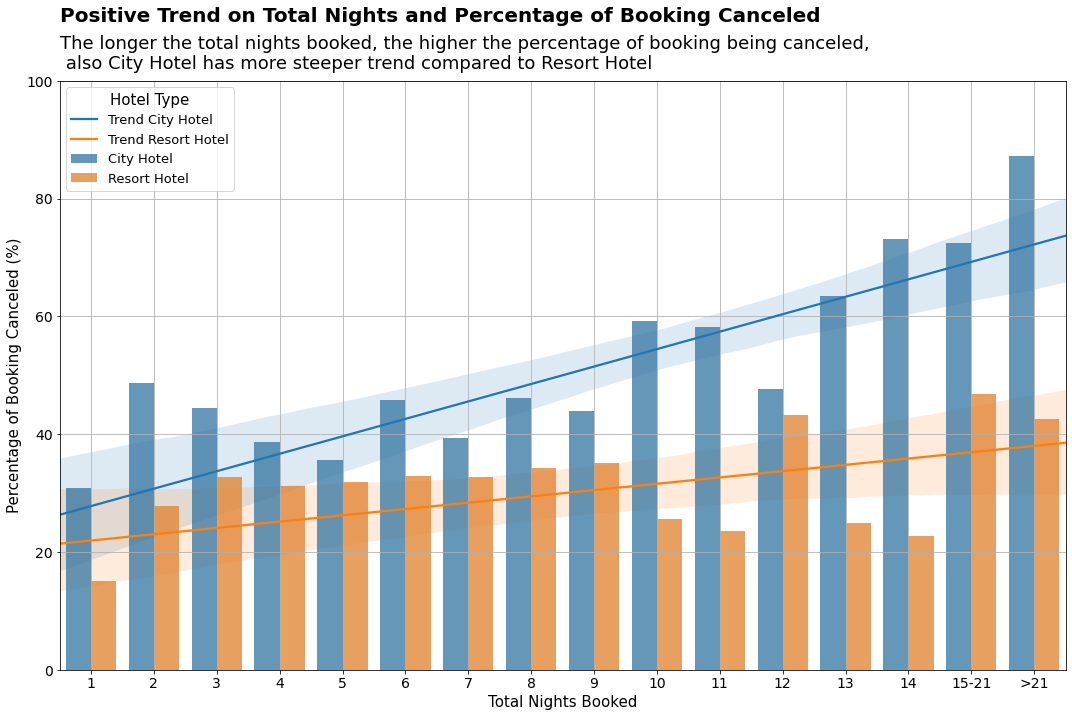

In [17]:
plt.figure(figsize=(15,10))
sns.regplot(x='total_nights_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='total_nights_group', y='pct_canceled', data=df2_pivot[df2_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='total_nights_group', y='pct_canceled', hue='hotel', data=df2_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) # mengatur customized-label pada x-axis
plt.xlabel('Total Nights Booked', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 16.5) # membatasi x axis

plt.text(x=0.5, y=110, s="Positive Trend on Total Nights and Percentage of Booking Canceled", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=0.5, y=102, s="The longer the total nights booked, the higher the percentage of booking being canceled, \n also City Hotel has more steeper trend compared to Resort Hotel", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('fig/investigate_hotel_business_v02.png', dpi=200); # menyimpan gambar

# Analisis Pengaruh Jarak waktu Pemesanan terhadap Tingkat Pembatalan Pemesanan Hotel

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

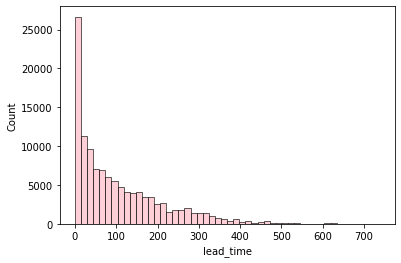

In [18]:
# Melakukan copy pada data hasil pre-processing
df3 = df_prep.copy() 

sns.histplot(data=df2, x="lead_time", bins=50, color="pink")

Berdasarkan pada histogram di atas, dapat dilihat bahwa persebaran data terlihat right-skewed. Oleh karena itu dilakukan pengelompokkan untuk membuat persebarannya menjadi lebih merata. Jarak waktu pemesanan yang mulanya dalam satuan harian, dikelompokkan menjadi satuan bulanan yakni per 30 hari.

In [19]:
# Mengkategorisasi kolom lead_time agar lebih sederhana
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [20]:
# melakukan agregasi data untuk menghitung jumlah pemesanan berdasarkan group lead_time yang sudah dibuat dan berdasarkan tipe hotel
df3_book = df3.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df3_pivot = df3_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5180,23240,22.289157
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


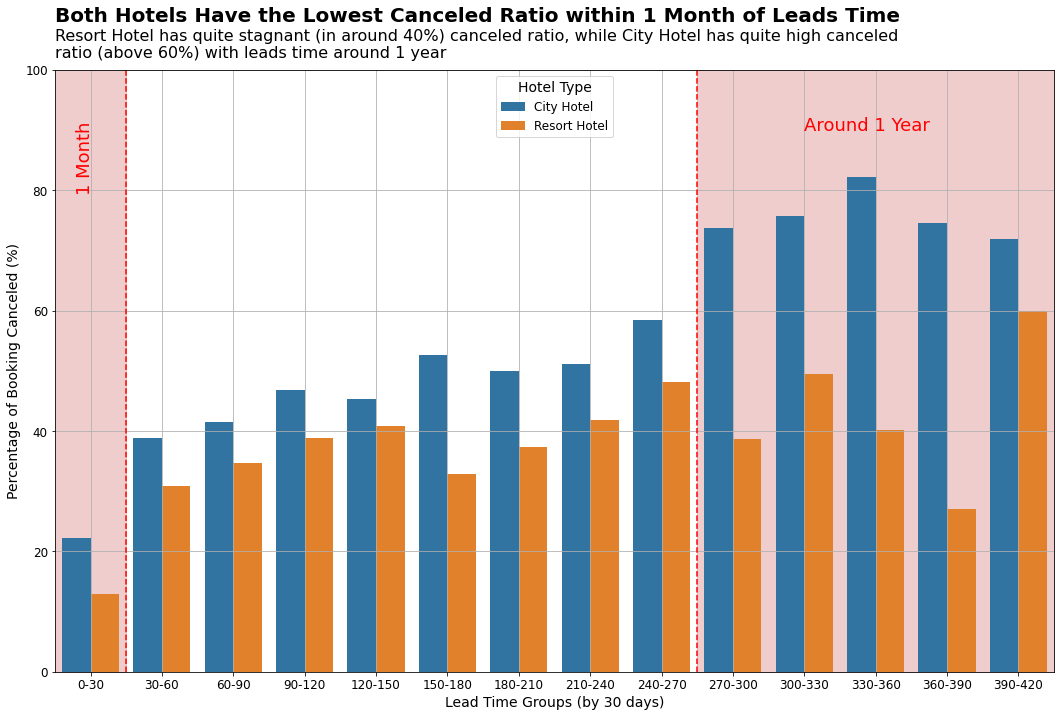

In [21]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df3_pivot) # plot awal menggunakan barplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # mengatur title pada y-axis 
plt.ylim(0, 100) # membatasi y-axis
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year", 
         fontsize=16) # memberikan keterangan tambahan atas judul
 
plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('fig/investigate_hotel_business_v03.png', dpi=200); # menyimpan gambar

- Crafted by Figarri Keisha
- Date: 2021-11-15
- For: Rakamin Academy